### SwinIR train_set 생성 notebook
    - input: 다양한 shape의 손글씨 이미지
    - output: hr: 128 x 128, sr: 64 x 64, csv

In [64]:
img = cv2.imread('img/bank_00001.jpg', cv2.IMREAD_GRAYSCALE)
clone = img.copy()

In [65]:
with open('img/bank_00001.json', encoding='UTF8') as f:
    json_object = json.load(f)
obj = json_object['annotations'][0]

In [66]:
json_object

{'Identifier': 'bank_00001',
 'name': 'bank_00001.jpg',
 'src_path': '/result/bank/images/bank_00001.jpg',
 'label_path': '/result/bank/annotations/bank_00001.json',
 'category': 0,
 'type': 1,
 'images': [{'identifier': 'bank_00001',
   'name': 'bank_00001.jpg',
   'type': 'jpg',
   'width': 2440,
   'height': 3501,
   'data_captured': '2021:08:06 17:28:26',
   'shutter_speed': '32',
   'f_stop': '2',
   'gps': '',
   'age': 58,
   'gender': 'female',
   'writer_num': 'bys-bang@hanmail.net',
   'shooting_env': '실내',
   'dust': '없음',
   'class': '금융',
   'persona': '60대이상',
   'document_name': '정보보안동의서'}],
 'annotations': [{'polygons': [{'id': '124d002e-1f01-4ab8-b7c5-e8f51c56c9d9',
     'type': 1,
     'text': '3.',
     'points': [[327.2859813379219, 293.6828955017222],
      [327.2859813379219, 246.57668915558662],
      [370.30964980072577, 246.57668915558662],
      [370.30964980072577, 293.6828955017222]]},
    {'id': '18c0eb01-1902-4d8d-bd06-290cb0d6c8fb',
     'type': 1,
     '

In [67]:
os.path.splitext(json_object['name'])

('bank_00001', '.jpg')

In [68]:
obj

{'polygons': [{'id': '124d002e-1f01-4ab8-b7c5-e8f51c56c9d9',
   'type': 1,
   'text': '3.',
   'points': [[327.2859813379219, 293.6828955017222],
    [327.2859813379219, 246.57668915558662],
    [370.30964980072577, 246.57668915558662],
    [370.30964980072577, 293.6828955017222]]},
  {'id': '18c0eb01-1902-4d8d-bd06-290cb0d6c8fb',
   'type': 1,
   'text': '조회에',
   'points': [[390.40829784174355, 297.4513920094131],
    [390.40829784174355, 245.6345650286639],
    [527.3303376211777, 245.6345650286639],
    [527.3303376211777, 297.4513920094131]]},
  {'id': '77ee31d0-8612-431c-a464-74c1b1f6f32c',
   'type': 1,
   'text': '관한',
   'points': [[548.0570684134775, 297.4513920094131],
    [548.0570684134775, 245.6345650286639],
    [641.3273569788261, 245.6345650286639],
    [641.3273569788261, 297.4513920094131]]},
  {'id': 'bf7be586-74f2-48c4-badd-245499473158',
   'type': 1,
   'text': '사항',
   'points': [[658.5996326390757, 299.6496816388995],
    [658.5996326390757, 245.63456502866393]

In [73]:
for polygon, bbox in zip(obj['polygons'], obj['bbox']):
    if polygon['type'] != 2:
        continue
    x1, y1 = int(bbox['x']), int(bbox['y'])
    x2, y2 = x1 + int(bbox['width']), y1 + int(bbox['height'])
#     print(polygon, bbox)
#     clone = cv2.rectangle(clone, (x1, y1), (x2, y2), (0,0,255), 10)
    cropped_image = img[y1:y2+1, x1:x2+1]
    y, x = cropped_image.shape
    m = max(y, x)
    cropped_image = cv2.resize(cropped_image, (, dst=None, fx=None, fy=None, interpolation=None)
#     print(polygon["text"])
    imwrite(f'{polygon["text"]}-{polygon["id"]}.jpg', cropped_image)

(105, 150)
(70, 61)
(86, 280)
(90, 267)


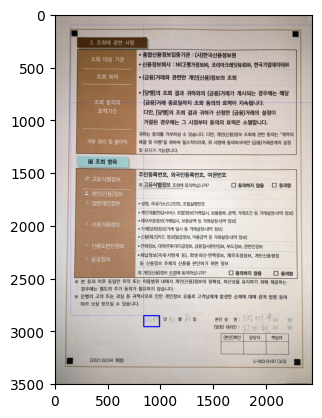

In [41]:
plt.imshow(clone)

In [3]:
hr_size = 256
lr_size = 64

In [6]:
dir_train = 'crop0/crop0'
file_list = os.listdir(dir_train)

In [10]:
x_sizes = []
y_sizes = []
temp2 = [0, 0, 0, 0]

In [12]:
for filename in file_list:
    try:
        img_array = np.fromfile(f'crop0/crop0/{filename}', np.uint8)
        img_hr = cv2.imdecode(img_array, cv2.IMREAD_GRAYSCALE)
        y, x = img_hr.shape
        x_sizes.append(x)
        y_sizes.append(y)
        if min(y, x) >= hr_size:
            temp2[0] += 1
        elif y >= hr_size:
            temp2[1] += 1
        elif x >= hr_size:
            temp2[2] += 1
        else:
            temp2[3] += 1
    except:
        print(filename)
        break
# print(sum(x_sizes)/len(x_sizes))
# print(sum(y_sizes)/len(y_sizes))
temp2

IMG_OCR_53_4PR_15925-오구화.jpg


[3, 0, 150218, 109698]

In [13]:
temp3 = [0, 0, 0, 0]

In [14]:
for filename in file_list:
    try:
        img_array = np.fromfile(f'crop0/crop0/{filename}', np.uint8)
        img_hr = cv2.imdecode(img_array, cv2.IMREAD_GRAYSCALE)
        y, x = img_hr.shape
#         x_sizes.append(x)
#         y_sizes.append(y)
        if min(y, x) >= 128:
            temp3[0] += 1
        elif y >= lr_size:
            temp3[1] += 1
        elif x >= lr_size:
            temp3[2] += 1
        else:
            temp3[3] += 1
    except:
        print(filename)
        break
temp3

IMG_OCR_53_4PR_09186-용면.jpg


[251, 15, 0, 0]

In [123]:
np.median(x_sizes), np.median(y_sizes)

(138.0, 60.0)

In [129]:
answer = []
for i in range(len(x_sizes)):
    if x_sizes[i] >= hr_size:
        answer.append(y_sizes[i])
print(np.mean(answer), np.median(answer))

74.45336338418862 67.0


In [133]:
answer2 = []
answer3 = []
for i in range(len(x_sizes)):
    if x_sizes[i] >= 128 and y_sizes[i] < 128:
        answer2.append(y_sizes[i])
    elif x_sizes[i] < 128 and y_sizes[i] >= 128:
        answer3.append(x_sizes[i])
print(np.mean(answer2), np.median(answer2))
print(np.mean(answer3), np.median(answer3))

65.70839151684413 64.0
107.61904761904762 112.0


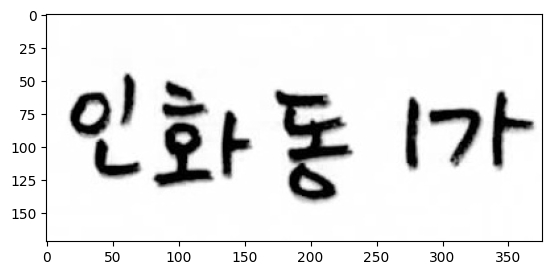

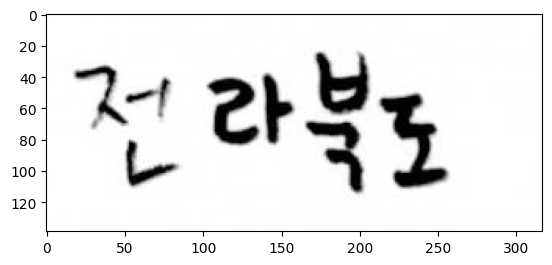

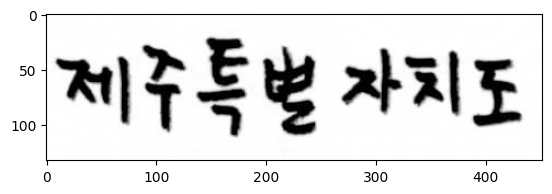

KeyboardInterrupt: 

In [23]:
cnt = 0
skip = 30000
for filename in file_list:
    if skip > 0:
        skip -= 1
        continue
    img_array = np.fromfile(f'crop0/crop0/{filename}', np.uint8)
    img_hr = cv2.imdecode(img_array, cv2.IMREAD_GRAYSCALE)
    y, x = img_hr.shape
    if y >= 128:
        plt.imshow(img_hr, cmap='gray')
        plt.show()
        cnt += 1
        if cnt >= 100:
            break

In [ ]:
h_old, w_old, _ = img_lq.shape
h_pad = math.ceil(h_old / window_size) * window_size - h_old
w_pad = math.ceil(w_old / window_size) * window_size - w_old
img_lq = np.pad(img_lq, ((0, h_pad), (0, w_pad), (0, 0)), mode='constant', constant_values=np.median(img_lq))

In [175]:
test = np.fromfile('textcrop/사업계획서수립제공후-399e8d66-94d4-4b68-a4b7-b81f1c848064.jpg', np.uint8)
test = cv2.imdecode(test, cv2.IMREAD_GRAYSCALE).astype('float32')

In [159]:
test.shape[1]/128

13.84375

In [149]:
int(test.shape[1]/3.5)

506.2857142857143

In [183]:
test.shape[]/128

0.030901227678571428

In [1]:
import cv2
import numpy as np
import json
import matplotlib.pyplot as plt
import os
import zipfile

In [10]:
def crop_and_padding_img(img, size):
    y, x = img.shape
    pad_value = np.median(img)
    if y <= size: img =  np.pad(img, ((size-y, 0),(0, 0)), mode='constant', constant_values=pad_value)
    if x <= size: return [np.pad(img, ((0,0),(size-img.shape[1], 0)), mode='constant', constant_values=pad_value)]
    l = [x]
    while x > 0:
        x -= size
        l.append(x)
    if l[-1] < 0:
        l.pop()
    crop_images = []
    for i in range(len(l)-1):
        crop_images.append(img[:, l[i+1]:l[i]])
    crop_images[-1] = np.pad(crop_images[-1], ((0,0),(size-crop_images[-1].shape[1], 0)), mode='constant', constant_values=pad_value)
    return crop_images

In [11]:
def imwrite(filename, img, params=None):
    try:
        ext = os.path.splitext(filename)[1]
        result, n = cv2.imencode(ext, img, params)

        if result:
            with open(filename, mode='w+b') as f:
                n.tofile(f)
            return True
        else:
            return False
    except Exception as e:
        print(e)
        return False

In [4]:
hr_size = 128
scale = 2

In [3]:
import pandas as pd
import pickle

In [10]:
with zip
file_list = z.namelist()

In [23]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(file_list,
                               test_size=0.4,
                               random_state=0)

val, test = train_test_split(val,
                           test_size=0.5,
                           random_state=0)

In [38]:
len(train), len(val), len(test)

(817978, 272659, 272660)

In [37]:
cnt = 0

In [39]:
lr = []
hr = []
with zipfile.ZipFile(r'train.zip', 'w', compression=zipfile.ZIP_DEFLATED) as new_zip:
    for filename in train:
        z.extract(filename)
        img_array = np.fromfile(filename, np.uint8)
        img_hr = cv2.imdecode(img_array, cv2.IMREAD_GRAYSCALE).astype('float32')
        y, x = img_hr.shape
        if y >= 128:
            for idx, img in enumerate(crop_and_padding_img(cv2.resize(img_hr, (int(img_hr.shape[1]/(img_hr.shape[0]/hr_size)), hr_size), interpolation = cv2.INTER_AREA), hr_size)):
                if np.min(img) >= 100: continue
                cnt += 1
                if cnt >= 7500: break
                lr_path = f'train_lr/img{str(cnt).zfill(5)}.jpg'
                hr_path = f'train_hr/img{str(cnt).zfill(5)}.jpg'
                lr.append(lr_path)
                hr.append(hr_path)
                imwrite(hr_path, img)
                imwrite(lr_path, cv2.resize(img, None, fx=1/scale, fy=1/scale, interpolation = cv2.INTER_AREA))
                new_zip.write(lr_path)
                new_zip.write(hr_path)
                try:
                    os.remove(lr_path)
                    os.remove(hr_path)
                except:
                    continue
        try: os.remove(filename)
        except: continue

In [19]:
# with open('train_df.pkl', 'wb') as fw:
#     pickle.dump(pd.DataFrame({'lr':lr, 'hr':lr}), fw)
# with open('train_df.pkl', 'rb') as fw:
#     temp = pickle.load(fw)
# temp
lr

['train_lr/img01142.jpg',
 'train_lr/img01143.jpg',
 'train_lr/img01144.jpg',
 'train_lr/img01145.jpg',
 'train_lr/img01146.jpg',
 'train_lr/img01147.jpg',
 'train_lr/img01148.jpg',
 'train_lr/img01149.jpg',
 'train_lr/img01150.jpg',
 'train_lr/img01151.jpg',
 'train_lr/img01152.jpg',
 'train_lr/img01153.jpg',
 'train_lr/img01154.jpg',
 'train_lr/img01155.jpg',
 'train_lr/img01156.jpg',
 'train_lr/img01157.jpg',
 'train_lr/img01158.jpg',
 'train_lr/img01159.jpg',
 'train_lr/img01160.jpg',
 'train_lr/img01161.jpg',
 'train_lr/img01162.jpg',
 'train_lr/img01163.jpg',
 'train_lr/img01164.jpg',
 'train_lr/img01165.jpg',
 'train_lr/img01166.jpg',
 'train_lr/img01167.jpg',
 'train_lr/img01168.jpg',
 'train_lr/img01169.jpg',
 'train_lr/img01170.jpg',
 'train_lr/img01171.jpg',
 'train_lr/img01172.jpg',
 'train_lr/img01173.jpg',
 'train_lr/img01174.jpg',
 'train_lr/img01175.jpg',
 'train_lr/img01176.jpg',
 'train_lr/img01177.jpg',
 'train_lr/img01178.jpg',
 'train_lr/img01179.jpg',
 'train_lr/i

In [40]:
import pandas as pd

In [41]:
pd.DataFrame({'lr':lr, 'hr':hr}).to_csv('train.csv')

In [42]:
lr = []
hr = []
with zipfile.ZipFile(r'val.zip', 'w', compression=zipfile.ZIP_DEFLATED) as new_zip:
    for filename in val:
        z.extract(filename)
        img_array = np.fromfile(filename, np.uint8)
        img_hr = cv2.imdecode(img_array, cv2.IMREAD_GRAYSCALE).astype('float32')
        y, x = img_hr.shape
        if y >= 128:
            for idx, img in enumerate(crop_and_padding_img(cv2.resize(img_hr, (int(img_hr.shape[1]/(img_hr.shape[0]/hr_size)), hr_size), interpolation = cv2.INTER_AREA), hr_size)):
                if np.min(img) >= 100: continue
                cnt += 1
                if cnt >= 10000: break
                lr_path = f'val_lr/img{str(cnt).zfill(5)}.jpg'
                hr_path = f'val_hr/img{str(cnt).zfill(5)}.jpg'
                lr.append(lr_path)
                hr.append(hr_path)
                imwrite(hr_path, img)
                imwrite(lr_path, cv2.resize(img, None, fx=1/scale, fy=1/scale, interpolation = cv2.INTER_AREA))
                new_zip.write(lr_path)
                new_zip.write(hr_path)
                try:
                    os.remove(lr_path)
                    os.remove(hr_path)
                except:
                    continue
        try: os.remove(filename)
        except: continue

In [ ]:
# with open('val_df.pkl', 'wb') as fw:
#     pickle.dump(pd.DataFrame({'lr':lr, 'hr':lr}), fw)
# with open('val_df.pkl', 'rb') as fw:
#     temp = pickle.load(fw)
# temp

In [43]:
pd.DataFrame({'lr':lr, 'hr':hr}).to_csv('val.csv')

In [44]:
lr = []
hr = []
with zipfile.ZipFile(r'test.zip', 'w', compression=zipfile.ZIP_DEFLATED) as new_zip:
    for filename in test:
        z.extract(filename)
        img_array = np.fromfile(filename, np.uint8)
        img_hr = cv2.imdecode(img_array, cv2.IMREAD_GRAYSCALE).astype('float32')
        y, x = img_hr.shape
        if y >= 128:
            for idx, img in enumerate(crop_and_padding_img(cv2.resize(img_hr, (int(img_hr.shape[1]/(img_hr.shape[0]/hr_size)), hr_size), interpolation = cv2.INTER_AREA), hr_size)):
                if np.min(img) >= 100: continue
                cnt += 1
                lr_path = f'test_lr/img{str(cnt).zfill(5)}.jpg'
                hr_path = f'test_hr/img{str(cnt).zfill(5)}.jpg'
                lr.append(lr_path)
                hr.append(hr_path)
                imwrite(hr_path, img)
                imwrite(lr_path, cv2.resize(img, None, fx=1/scale, fy=1/scale, interpolation = cv2.INTER_AREA))
                new_zip.write(lr_path)
                new_zip.write(hr_path)
                try:
                    os.remove(lr_path)
                    os.remove(hr_path)
                except:
                    continue
        try: os.remove(filename)
        except: continue

In [ ]:
# with open('test_df.pkl', 'wb') as fw:
#     pickle.dump(pd.DataFrame({'lr':lr, 'hr':lr}), fw)
# with open('test_df.pkl', 'rb') as fw:
#     temp = pickle.load(fw)
# temp

In [45]:
pd.DataFrame({'lr':lr, 'hr':hr}).to_csv('test.csv')

In [95]:
for i in os.listdir('train_lr/'):
    if cv2.imread(f'train_lr/{i}').shape != (64, 64, 3):
        print(i)

In [1]:
import cv2
import numpy as np
import json
import matplotlib.pyplot as plt
import os
import zipfile
import pandas as pd
import random

In [2]:
from sklearn.model_selection import train_test_split

In [10]:
with zipfile.ZipFile('test.zip') as zf:
    namelist = set([x.replace('test_lr/','').replace('test_hr/', '') for x in zf.namelist()])

In [29]:
list(namelist)[:10000]

['img1113234.jpg',
 'img1116870.jpg',
 'img1116072.jpg',
 'img1166050.jpg',
 'img1284474.jpg',
 'img1311179.jpg',
 'img1333554.jpg',
 'img1213690.jpg',
 'img1116844.jpg',
 'img1299672.jpg',
 'img1236464.jpg',
 'img1203994.jpg',
 'img1364599.jpg',
 'img1153919.jpg',
 'img1124314.jpg',
 'img1336416.jpg',
 'img1195368.jpg',
 'img1295593.jpg',
 'img1348347.jpg',
 'img1240964.jpg',
 'img1188471.jpg',
 'img1131346.jpg',
 'img1162289.jpg',
 'img1136360.jpg',
 'img1225820.jpg',
 'img1194606.jpg',
 'img1241403.jpg',
 'img1305297.jpg',
 'img1189370.jpg',
 'img1222387.jpg',
 'img1309186.jpg',
 'img1341693.jpg',
 'img1366992.jpg',
 'img1195284.jpg',
 'img1200640.jpg',
 'img1227054.jpg',
 'img1190606.jpg',
 'img1155852.jpg',
 'img1165633.jpg',
 'img1261822.jpg',
 'img1307173.jpg',
 'img1139512.jpg',
 'img1141098.jpg',
 'img1176634.jpg',
 'img1224661.jpg',
 'img1121283.jpg',
 'img1338593.jpg',
 'img1114587.jpg',
 'img1163962.jpg',
 'img1156462.jpg',
 'img1278958.jpg',
 'img1239741.jpg',
 'img1193121

In [21]:
train, val = train_test_split(list(namelist)[:10000], random_state=0)

In [22]:
pd.DataFrame({'lr':[f'test_lr/{x}' for x in train], 'hr':[f'test_hr/{x}' for x in train]}).to_csv('train.csv')

In [23]:
pd.DataFrame({'lr':[f'test_lr/{x}' for x in val], 'hr':[f'test_hr/{x}' for x in val]}).to_csv('val.csv')

In [25]:
pd.read_csv('train.csv')

,Unnamed: 0,lr,hr
0,0,test_lr/img1276379.jpg,test_hr/img1276379.jpg
1,1,test_lr/img1338325.jpg,test_hr/img1338325.jpg
2,2,test_lr/img1248645.jpg,test_hr/img1248645.jpg
3,3,test_lr/img1234757.jpg,test_hr/img1234757.jpg
4,4,test_lr/img1263282.jpg,test_hr/img1263282.jpg
...,...,...,...
7495,7495,test_lr/img1291331.jpg,test_hr/img1291331.jpg
7496,7496,test_lr/img1217381.jpg,test_hr/img1217381.jpg
7497,7497,test_lr/img1354780.jpg,test_hr/img1354780.jpg
7498,7498,test_lr/img1155086.jpg,test_hr/img1155086.jpg


(['img1276379.jpg',
  'img1338325.jpg',
  'img1248645.jpg',
  'img1234757.jpg',
  'img1263282.jpg',
  'img1257334.jpg',
  'img1156083.jpg',
  'img1129231.jpg',
  'img1239262.jpg',
  'img1308079.jpg',
  'img1357944.jpg',
  'img1281176.jpg',
  'img1328599.jpg',
  'img1288664.jpg',
  'img1308548.jpg',
  'img1367684.jpg',
  'img1370735.jpg',
  'img1294418.jpg',
  'img1175085.jpg',
  'img1168316.jpg',
  'img1257405.jpg',
  'img1243517.jpg',
  'img1107682.jpg',
  'img1249691.jpg',
  'img1127066.jpg',
  'img1212960.jpg',
  'img1309000.jpg',
  'img1169524.jpg',
  'img1299509.jpg',
  'img1365705.jpg',
  'img1373534.jpg',
  'img1108210.jpg',
  'img1368505.jpg',
  'img1377737.jpg',
  'img1307119.jpg',
  'img1266266.jpg',
  'img1153109.jpg',
  'img1107281.jpg',
  'img1149340.jpg',
  'img1167755.jpg',
  'img1332987.jpg',
  'img1281574.jpg',
  'img1199916.jpg',
  'img1211875.jpg',
  'img1125721.jpg',
  'img1377973.jpg',
  'img1319757.jpg',
  'img1236438.jpg',
  'img1220324.jpg',
  'img1293829.jpg',


In [3]:
path_train = r'C:\Users\Playdata\Downloads\trainset\train_lr'
path_val = r'C:\Users\Playdata\Downloads\trainset\val_lr'

In [22]:
src = cv2.imread(f'{path}/img1108252.jpg', cv2.IMREAD_GRAYSCALE)

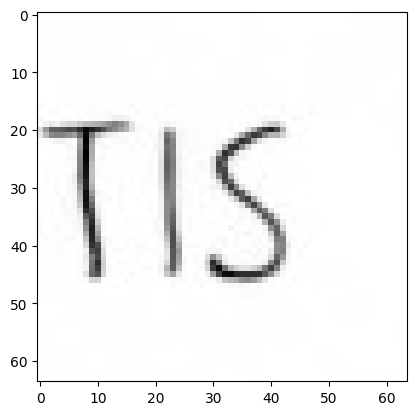

In [23]:
plt.imshow(src, cmap='gray')

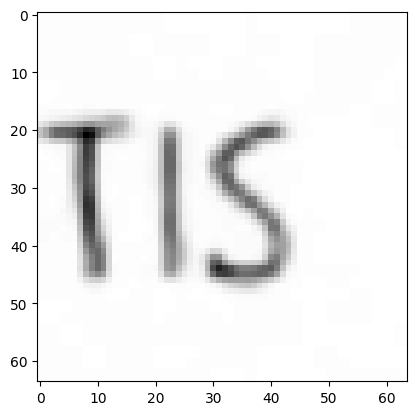

In [24]:
plt.imshow(cv2.resize(cv2.resize(src, (32, 32)), (64, 64)), cmap='gray')

In [25]:
for i in os.listdir(path_train):
    src = cv2.imread(f'{path_train}/{i}', cv2.IMREAD_GRAYSCALE)
    cv2.imwrite(f'{path_train}/{i}', cv2.resize(cv2.resize(src, (32, 32)), (64, 64)))

In [26]:
for i in os.listdir(path_val):
    src = cv2.imread(f'{path_val}/{i}', cv2.IMREAD_GRAYSCALE)
    cv2.imwrite(f'{path_val}/{i}', cv2.resize(cv2.resize(src, (32, 32)), (64, 64)))

In [7]:
original = r'C:\im\final-project\results\trainset_sr\trainset_handwriting_ocr_text_crop\crop.zip'

In [3]:
os.mkdir('./train_lr')
os.mkdir('./val_lr')
os.mkdir('./val_hr')
os.mkdir('./train_hr')

In [12]:
now = 'train'
cnt = 0
hr_size = 32

In [13]:
cnt = 0
with zipfile.ZipFile(original) as zf:
    for i in set(zf.namelist()):
        img = cv2.imdecode(np.frombuffer(zf.read(i), np.uint8), 1)
        img = cv2.cvtColor(img,  cv2.COLOR_BGR2GRAY)
        img = np.clip(img - float(random.randint(5, 30)), 0, 255).astype(np.uint8)
        for img_crop in crop_and_padding_img(cv2.resize(img, (int(img.shape[1]/(img.shape[0]/hr_size)), hr_size), interpolation = cv2.INTER_AREA), hr_size):
            if cnt >= 100000: now = 'val'
            elif cnt >= 125000: break
            cnt+=1
            imwrite(f'{now}_hr/{str(cnt).zfill(5)}.jpg', img_crop)
#             n = random.randint(16,40)
            imwrite(f'{now}_lr/{str(cnt).zfill(5)}.jpg', cv2.resize(img_crop, dsize=(16, 16), interpolation=cv2.INTER_AREA))
        if cnt >= 125000: break

In [ ]:
plt.imshow(img)

In [14]:
import pandas as pd
l = sorted(os.listdir('train_lr'))
pd.DataFrame({'lr': [f'train_lr/{x}' for x in l], 'hr':[f'train_hr/{x}' for x in l]}).to_csv('train.csv')


In [15]:
l = sorted(os.listdir('val_lr'))
pd.DataFrame({'lr': [f'val_lr/{x}' for x in l], 'hr':[f'val_hr/{x}' for x in l]}).to_csv('val.csv')